In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from utils import *

# preprocess and load data
filepath = 'train_data.pkl'
if not os.path.exists(filepath):
    general_process(output_filepath=filepath)
with open(filepath, 'rb') as fin:
    df = pickle.load(fin)
df.head(1)

,type_material,temp,freq,core_loss,type_waveform,flux_density
0,1,25,50030,1997.95525,正弦波,"[0.000212759, 0.000389496, 0.00056608, 0.00074..."


In [3]:
df[df.isna().any(axis=1)]

,type_material,temp,freq,core_loss,type_waveform,flux_density


# 问题一： 励磁波形分类

输入一个长度为1024的序列，输出一个类别（正弦波0、三角波1、梯形波2）

In [5]:
df[df['type_waveform'] == '梯形波'].head()

,type_material,temp,freq,core_loss,type_waveform,flux_density
2370,1,25,50060,12568.70593,梯形波,"[-0.031923941, -0.031231432, -0.030540103, -0...."
2371,1,25,50060,16599.30243,梯形波,"[-0.034441236, -0.033659254, -0.032878475, -0...."
2372,1,25,50060,22311.45558,梯形波,"[-0.039525114, -0.038648098, -0.037772171, -0...."
2373,1,25,50070,28359.74243,梯形波,"[-0.045434613, -0.044454803, -0.043476428, -0...."
2374,1,25,50070,38051.07209,梯形波,"[-0.051213874, -0.05010902, -0.049007501, -0.0..."


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [12]:
sequence[:20]

array([-0.03192394, -0.03123143, -0.0305401 , -0.02984963, -0.02915823,
       -0.02846833, -0.02778013, -0.02708925, -0.02639916, -0.02570962,
       -0.02501992, -0.02433175, -0.02364336, -0.02295583, -0.02226819,
       -0.02158038, -0.02089518, -0.02021036, -0.01952333, -0.01883542])

In [7]:
sequence = df[df['type_waveform'] == '梯形波']['flux_density'].iloc[0]
slope = np.diff(sequence)
(slope * 1e4)[:20]

array([6.92509, 6.91329, 6.90473, 6.91396, 6.89908, 6.88197, 6.90877,
       6.90087, 6.8954 , 6.89705, 6.88168, 6.88395, 6.87524, 6.87645,
       6.87812, 6.85196, 6.84817, 6.87036, 6.87905, 6.86585])

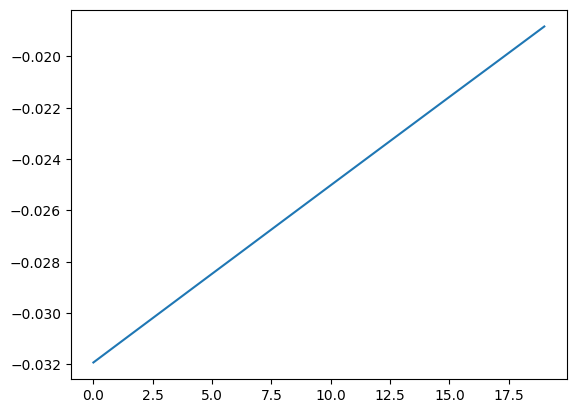

In [11]:
plt.plot(sequence[:20])

In [75]:
# calculate the unique slope values in the sequence with a tolerance
sequence = df[df['type_waveform'] == '梯形波']['flux_density'].iloc[0]
slope = np.diff(sequence) * 1e4
# round the slope values to a certain number of decimal places to account for small differences
rounded_slope = np.round(slope, decimals=3)
# count unique slope values
unique_slope_values = np.unique(rounded_slope)
len(unique_slope_values)

360

IndexError: single positional indexer is out-of-bounds

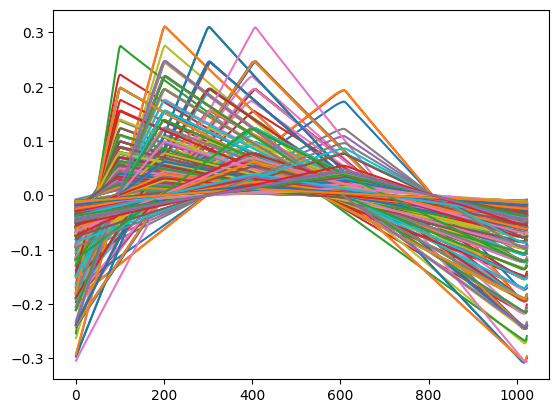

In [25]:
for i in range(1, 10000, 10):
    plt.plot(df[df['type_waveform'] == '三角波']['flux_density'].iloc[i])

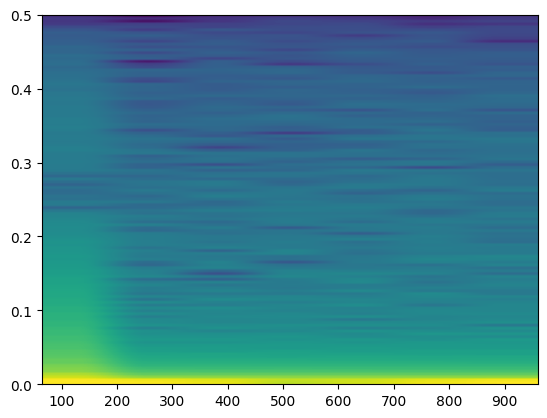

In [38]:
plt.specgram(df[df['type_waveform'] == '三角波']['flux_density'].iloc[0], Fs=1)
plt.show()

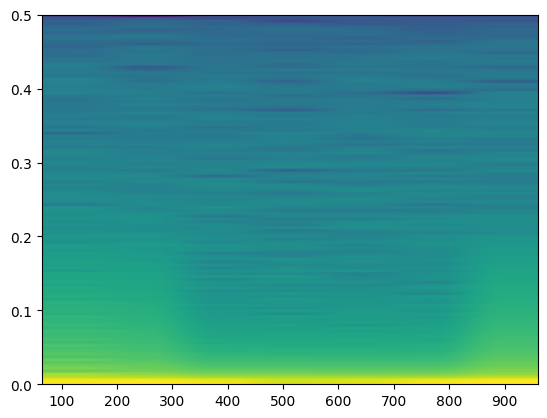

In [39]:
plt.specgram(df[df['type_waveform'] == '正弦波']['flux_density'].iloc[0], Fs=1)
plt.specgram(df[df['type_waveform'] == '梯形波']['flux_density'].iloc[0], Fs=1)
plt.show()

In [31]:
df_sample = df.sample(frac=0.1, random_state=1)
df_sample.to_pickle('demo.pkl')

In [32]:
df_sample

,type_material,temp,freq,core_loss,type_waveform,0,flux_density
5491,2,25,158750,76872.063040,梯形波,NaN,"[nan, -0.031429734, -0.03072461, -0.030026205,..."
3358,1,90,251240,12038.459880,梯形波,-0.012717,"[-0.012717071, -0.012432538, -0.012150708, -0...."
2641,1,50,56160,20591.213130,梯形波,-0.045033,"[-0.045033225, -0.044047581, -0.043065126, -0...."
6295,2,90,316450,55887.824120,梯形波,NaN,"[nan, -0.028520961, -0.028213464, -0.027907468..."
11042,4,70,112170,32596.455650,三角波,-0.044219,"[-0.0442194, -0.043235718, -0.04226253, -0.041..."
...,...,...,...,...,...,...,...
3570,2,50,398100,53091.371120,正弦波,NaN,"[nan, 9.28e-05, 0.000285546, 0.000478234, 0.00..."
2690,1,50,99970,7829.087814,梯形波,-0.022670,"[-0.022669717, -0.022174313, -0.02168233, -0.0..."
11351,4,90,177890,82288.229620,三角波,-0.043631,"[-0.043631311, -0.042619081, -0.041619808, -0...."
3380,1,90,282480,67841.204870,梯形波,-0.025358,"[-0.025357883, -0.024798734, -0.02424312, -0.0..."
